In [3]:
import tensorflow as tf

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [5]:
tf.__version__

'1.12.0'

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1999 - acc: 0.9410
Epoch 2/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0798 - acc: 0.9753
Epoch 3/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0542 - acc: 0.9830
Epoch 4/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0359 - acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0276 - acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0222 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0168 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0144 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0126 - acc: 0.9959
Epoch 10/10
10000/10000 [==============================] - 1s 54us/step


[0.0966885518838415, 0.9787]

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [10]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

In [11]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [12]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


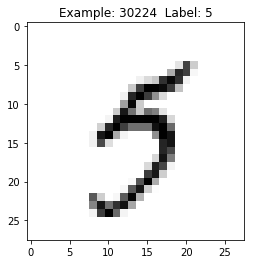

In [13]:
display_digit(ran.randint(0,x_train.shape[0]))

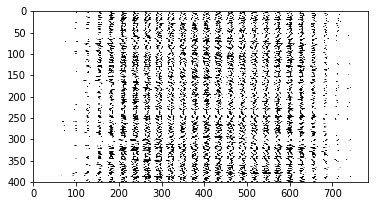

In [14]:
display_mult_flat(0,400)

In [15]:
import tensorflow as tf
sess = tf.Session()

In [16]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [17]:
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [18]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [19]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [20]:
print(y)

Tensor("Softmax_1:0", shape=(?, 10), dtype=float32)


In [21]:
x_train, y_train = TRAIN_SIZE(3)
sess.run(tf.global_variables_initializer())
#If using TensorFlow prior to 0.12 use:
#sess.run(tf.initialize_all_variables())
print(sess.run(y, feed_dict={x: x_train}))

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (3, 784)
y_train Examples Loaded = (3, 10)

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


In [22]:
sess.run(tf.nn.softmax(tf.zeros([4])))
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([0.11634309, 0.10579926, 0.7778576 ], dtype=float32)

In [23]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [24]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]

In [25]:
k=[0,0,0,1,0,0,0,0,0,0]

In [26]:
-np.log(j)
-np.multiply(np.log(j),k)

array([0.        , 0.        , 0.        , 0.10536052, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [27]:
k = [0,0,1,0,0,0,0,0,0,0]
np.sum(-np.multiply(np.log(j),k))

4.605170185988091

In [28]:
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


In [29]:
init = tf.global_variables_initializer()
#If using TensorFlow prior to 0.12 use:
#init = tf.initialize_all_variables()
sess.run(init)

In [30]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.5988  Loss = 2.1881988
Training Step:100  Accuracy =  0.8647  Loss = 0.5802968
Training Step:200  Accuracy =  0.879  Loss = 0.45982155
Training Step:300  Accuracy =  0.8866  Loss = 0.40857223
Training Step:400  Accuracy =  0.8904  Loss = 0.3780811
Training Step:500  Accuracy =  0.8943  Loss = 0.35697538
Training Step:600  Accuracy =  0.8974  Loss = 0.34104994
Training Step:700  Accuracy =  0.8984  Loss = 0.32834953
Training Step:800  Accuracy =  0.9  Loss = 0.3178265
Training Step:900  Accuracy =  0.9005  Loss = 0.30886242
Training Step:1000  Accuracy =  0.9009  Loss = 0.30106452
Training Step:1100  Accuracy =  0.9023  Loss = 0.29417017
Training Step:1200  Accuracy =  0.9029  Loss = 0.287995
Training Step:1300  Accuracy =  0.9033  Loss = 0.2824061
Training Step:1400  Accuracy =  0.9039  Loss = 0.27730307
Training Step:1500  Accuracy =  0.9048  Loss = 0.2726099
Training Step:1600  Accuracy =  0.9057  Loss = 0.26826677
Training Step:1700  Accuracy =  0.9062

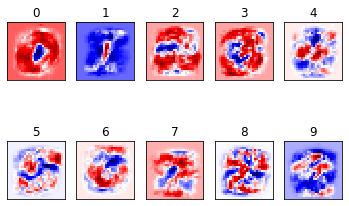

In [32]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

In [33]:
plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


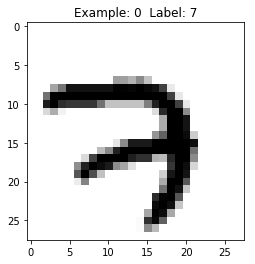

In [34]:
x_train, y_train = TRAIN_SIZE(1)
display_digit(0)

In [35]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[2.12480500e-05 1.16469355e-05 8.96317661e-02 1.92015395e-02
  8.20864807e-04 1.25168417e-05 3.85382264e-05 8.53745937e-01
  6.91889087e-03 2.95969862e-02]]


In [36]:
answer.argmax()


7

In [37]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    # THIS GETS OUR PREDICTION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

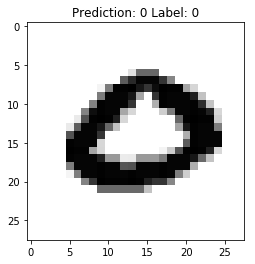

In [38]:
display_compare(ran.randint(0, 55000))

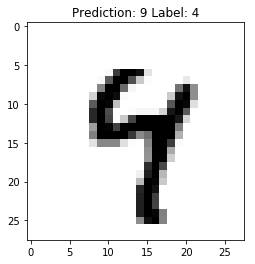

In [39]:
display_compare(2)